# Ringkasan Berita


Ringkasan berita digunakan untuk mempermudah ketika ingin mengetahui isi berita secara jelas dan ringkas


## Proses Pembersihan Teks


### Import Library


In [1]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [2]:
data = pd.read_csv('../tugas1/data_100.csv')
data.head()

,judul,tanggal,isi,kategori
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional


### Preprocessing Text


In [3]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r'rt', ' ', text) # Menghapus retweet
	text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

In [4]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

prep_result = preprocess_text(data['isi'])

100%|██████████| 100/100 [00:00<00:00, 178.69it/s]


Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


#### Hasil Preprocessing


In [5]:
print(prep_result[4])

pasukan pe ahanan israel idf bersiaga ketat perbatasan menjelang agresi jalur gaza palestina minggu . idf bersiaga mengantisipasi serangan kelompok milisi hamas palestina senin peringatan konflik oktober . the times of israel melaporkan idf memperkuat pasukan perbatasan mengantisipasi serangan roket jarak ditembakkan gaza . sumber militer percaya hamas serangan roket operasinya ditumpas israel . komando selatan pe ahanan serangan skenario bulanbulan bersamaan acara peringatan dilaksanakan aman pernyataan idf . militer hamas menembakkan roket gaza perbatasan israel . militer memperkuat pe ahanan perbatasan gaza koridor netzarim lokasi pendudukan idf . kompi dilaporkan dikerahkan menjaga kotakota perbatasan zionis . kewaspadaan . tingkat kesiapan tindakan ofensif kepala komando selatan yaron finkelman . sabtu malam juru bicara idf daniel hagari mewantiwanti warga sipil berhatihati . meningkatkan pasukan mengantisipasi . agresi israel gaza senin memasuki diluncurkan oktober pasca serangan

### Memisahkan Kalimat Berita


In [14]:
kalimat_preprocessing = nltk.sent_tokenize(prep_result[4])
kalimat = nltk.sent_tokenize(data['isi'][4])

Memisahkan kalimat pada berita yang diakhiri dengan titik, untuk setiap kalimat


## TF-IDF


$$W_{d,t} = tf_{t,d} \cdot idf_{t,d}$$


Keterangan:

$W_{d,t}$ = Nilai _Term Frequency_ untuk _term_ (t) dalam dokumen (d).<br>
$tf_{t,d}$ = Frekuensi kemunculan _term_ (t) dalam dokumen (d).<br>
$idf_{t,d}$ = Inverse Document Frequency Nilai kebalikan frekuensi dokumen _term_ (t) dalam dokumen (d).


$$tf= \frac{tf}{max(tf)}$$


Keterangan:

$tf$ = banyaknya kata yang dicari dalam dokumen<br>
$max⁡(tf)$ = jumlah kemunculan term terbanyak pada dokumen yang sama


$$idf_{t}= \frac{D}{max(df_{t})}$$


Keterangan:

$D$ = total dokumen<br>
$df(t)$ = jumlah dokumen yang mengandung _term_ (t)


TF-IDF setiap kalimat, untuk menghitung term yang ada pada setiap kalimatnya.


In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocessing = tfidf_vectorizer.fit_transform(kalimat_preprocessing)

terms = tfidf_vectorizer.get_feature_names_out()
tfidf_preprocessing = pd.DataFrame(data=tfidf_preprocessing.toarray(), columns=terms)

tfidf_preprocessing

,acara,agresi,ahanan,aman,aviv,berhatihati,berkumpul,bersamaan,bersiaga,bicara,...,tewas,the,times,tindakan,tingkat,upacara,warga,yarkon,yaron,zionis
0,0.000000,0.261111,0.261111,0.000000,0.000000,0.000000,0.000000,0.000000,0.287630,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.303353,0.303353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.297553,0.000000,0.239055,0.297553,0.000000,0.000000,0.000000,0.297553,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.283608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393022
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.341664,0.341664,0.000000,0.000000,0.000000,0.341664,0.000000


## Cosine Similarity


Cosine similarity digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Hasil dari cosine similarity ini akan menentukan apakah vektor tersebut menuju ke arah yang sama. Semakin kecil sudut antara dua vektor, maka semakin mirip satu sama lain sedangkan begitu juga sebaliknya, semakin besar nilai cosine similarity maka vektor tersebut dianggap jauh kemiripannya. Dalam ringkasan dokumen ini penting untuk menghitung nilai cosine similarity untuk mengetahui hubungan kesamaan antara kalimat satu dengan kalimat lainnya. Vektor yang digunakan untuk menghitung nilai cosine simmilarity ini adalah hasil dari TF-IDF pada langkah sebelumnya.


$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$


Keterangan:

$A.B$ = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{k}y_{k}$

$|A|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n x_{k}^2$ = $\sqrt{\mathrm{a}_{1}^{2} + \mathrm{a}_{2}^{2} + \mathrm{a}_{3}^{2}} +...+ \mathrm{n}_{n}^{2}$

$|B|$ = Panjang vektor B dihitung dengan $\sum_{i=1}^n y_{k}^2$ = $\sqrt{\mathrm{b}_{1}^{2} + \mathrm{b}_{2}^{2} + \mathrm{b}_{3}^{2}} + ...+ \mathrm{n}_{n}^{2}$


In [8]:
cossim_prep = cosine_similarity(tfidf_preprocessing, tfidf_preprocessing)

similarity_matrix = pd.DataFrame(cossim_prep, 
								 index=range(len(kalimat_preprocessing)), 
								 columns=range(len(kalimat_preprocessing)))

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.215494,0.228614,0.046935,0.165032,0.206542,0.297843,0.060533,0.0,0.00000,...,0.134609,0.000000,0.054988,0.205730,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.215494,1.000000,0.167402,0.118737,0.153751,0.066888,0.052746,0.000000,0.0,0.00000,...,0.148901,0.000000,0.060826,0.147209,0.000000,0.117044,0.085138,0.000000,0.0,0.116067
2,0.228614,0.167402,1.000000,0.176981,0.080290,0.291716,0.223633,0.056500,0.0,0.00000,...,0.000000,0.000000,0.051324,0.096049,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.046935,0.118737,0.176981,1.000000,0.055303,0.401754,0.089362,0.000000,0.0,0.00000,...,0.000000,0.000000,0.132711,0.116669,0.000000,0.051327,0.000000,0.000000,0.0,0.000000
4,0.165032,0.153751,0.080290,0.055303,1.000000,0.000000,0.179251,0.000000,0.0,0.15925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.057931,0.000000,0.000000,0.0,0.096063
5,0.206542,0.066888,0.291716,0.401754,0.000000,1.000000,0.273789,0.094109,0.0,0.00000,...,0.000000,0.000000,0.170976,0.235138,0.000000,0.066127,0.000000,0.000000,0.0,0.000000
6,0.297843,0.052746,0.223633,0.089362,0.179251,0.273789,1.000000,0.065748,0.0,0.00000,...,0.000000,0.000000,0.000000,0.059265,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.060533,0.000000,0.056500,0.000000,0.000000,0.094109,0.065748,1.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.159250,0.000000,0.000000,0.000000,0.0,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


## Graph


Hasil dari nilai _Cosine Simmilarity_ ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas _(threshold)_ yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis _(edge)_. Nilai ambang batas _(threshold)_ yang digunakan adalah **0.1**


In [9]:
# threshold = 0.5
# adjacency_matrix = (similarity_matrix > threshold).astype(int)
# adjacency_matrix

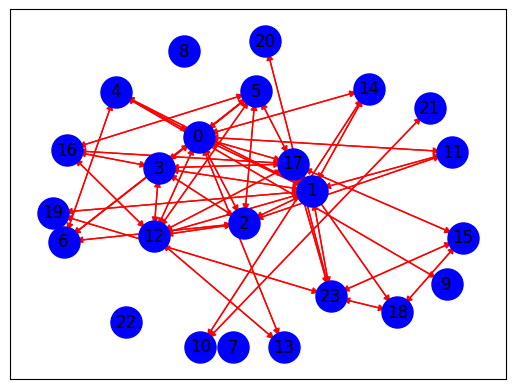

In [28]:
G_preprocessing = nx.DiGraph()
for i in range(len(cossim_prep)):
    G_preprocessing.add_node(i)

for i in range(len(cossim_prep)):
    for j in range(len(cossim_prep)):
        similarity_preprocessing = cossim_prep[i][j]
        if similarity_preprocessing > 0.1 and i != j:
            G_preprocessing.add_edge(i, j)

pos = nx.spring_layout(G_preprocessing, k=2)
nx.draw_networkx_nodes(G_preprocessing, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G_preprocessing, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G_preprocessing, pos)

plt.show()

## Matrix Centralitas


Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan. Sentralitas adalah konsep dalam analisis jaringan yang mencoba mengukur sejauh mana suatu node berada di pusat jaringan atau sejauh mana suatu node penting dalam graph.


### Closeness Centrality


Closeness similarity adalah ukuran sejauh mana nilai kedekatan antara pasangan node dalam suatu jaringan serupa. Dengan ini kita dapat mengukur kesamaan struktural antara node-node dalam graf berdasarkan nilai kedekatan mereka.


$$CC(i) = \frac{N-1}{\sum_{j}d(i, j)}$$


Keterangan:

$N$ = nomor dari masing-masing node<br>
$d(i, j)$ = $d$ adalah panjang jalur terpendek antara node $i$ dan $j$ dalam jaringan


#### Closeness Centrality


In [11]:
closeness_preprocessing = nx.closeness_centrality(G_preprocessing)

sorted_closeness_preprocessing = sorted(closeness_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 1: 0.5610
Node 0: 0.5435
Node 17: 0.4969
Node 12: 0.4700
Node 3: 0.4459
Node 5: 0.4459
Node 2: 0.4348
Node 23: 0.4348
Node 14: 0.4141
Node 4: 0.4044
Node 6: 0.3865
Node 11: 0.3865
Node 19: 0.3781
Node 13: 0.3623
Node 16: 0.3623
Node 15: 0.3478
Node 18: 0.3478
Node 10: 0.2948
Node 20: 0.2948
Node 9: 0.2805
Node 21: 0.2230
Node 7: 0.0000
Node 8: 0.0000
Node 22: 0.0000


#### Ringkasan Berita


In [15]:
ringkasan_closeness_preprocessing = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_preprocessing in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_closeness_preprocessing += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 1: Closeness Centrality = 0.5610
Kalimat: IDF bersiaga untuk mengantisipasi serangan kelompok milisi Hamas Palestina pada Senin (7/10), hari peringatan satu tahun konflik yang telah dimulai sejak 7 Oktober 2023 lalu.

Node 0: Closeness Centrality = 0.5435
Kalimat: Pasukan Pertahanan Israel (IDF) bersiaga ketat di perbatasan menjelang satu tahun agresi di Jalur Gaza, Palestina, Minggu (6/10) waktu setempat.

Node 17: Closeness Centrality = 0.4969
Kalimat: Keluarga para sandera Hamas, baik yang masih ditawan maupun yang tewas, dikabarkan bakal menggelar peringatan satu tahun penyanderaan tersebut.



### Page Rank


Dalam konteks ini, dokumen dianggap sebagai “halaman” yang terhubung oleh hubungan yang merefleksikan keterkaitan atau relevansinya. Dengan menerapkan konsep PageRank, dokumen yang dianggap lebih “penting” atau relevan dapat diberikan skor lebih tinggi. Penggunaan faktor damping, serupa dengan dalam algoritma PageRank, dapat membantu mengontrol sejauh mana pengaruh satu dokumen terhadap yang lain. Dengan memberikan skor pada dokumen berdasarkan hubungan mereka dalam jaringan informasi, kita dapat menghasilkan ringkasan yang mencerminkan tingkat relevansi dan pentingnya masing-masing dokumen dalam konteks keseluruhan.


$$PR_i = \frac{1-d}{n} + d \sum_{P_j\in\{1 \dots,n\}} \frac{PR_i}{L_j}$$


Keterangan:

$PR(i)$ = adalah PageRank dari halaman web ke i.<br>
$d$ = adalah faktor redaman, biasanya diatur sebesar 0,85, yang digunakan untuk menghitung probabilitas bahwa peramban acak akan “melompat” ke halaman acak dan tidak mengikuti sebuah link.<br>
$PR(i)$ = adalah PageRank halaman ke i, yaitu halaman yang memiliki sambungan yang mengarah ke halaman i.<br>
$L(c)$ = adalah jumlah hubungan keluar pada halaman j.


In [20]:
pagerank_preprocessing = nx.pagerank(G_preprocessing)

sorted_pagerank_preprocessing= sorted(pagerank_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing:
    print(f"Node {node}: {pagerank_preprocessing:.4f}")

Page Rank :
Node 1: 0.0973
Node 0: 0.0886
Node 12: 0.0869
Node 5: 0.0793
Node 15: 0.0771
Node 2: 0.0764
Node 4: 0.0617
Node 19: 0.0578
Node 11: 0.0501
Node 6: 0.0455
Node 3: 0.0453
Node 16: 0.0402
Node 13: 0.0379
Node 8: 0.0316
Node 17: 0.0305
Node 18: 0.0295
Node 9: 0.0209
Node 10: 0.0182
Node 7: 0.0175
Node 14: 0.0078


#### Hasil Ringkasan


In [21]:
ringkasan_pagerank_preprocessing = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank_preprocessing += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 1: Page Rank = 0.0973
Kalimat: IDF bersiaga untuk mengantisipasi serangan kelompok milisi Hamas Palestina pada Senin (7/10), hari peringatan satu tahun konflik yang telah dimulai sejak 7 Oktober 2023 lalu.

Node 0: Page Rank = 0.0886
Kalimat: Pasukan Pertahanan Israel (IDF) bersiaga ketat di perbatasan menjelang satu tahun agresi di Jalur Gaza, Palestina, Minggu (6/10) waktu setempat.

Node 12: Page Rank = 0.0869
Kalimat: Agresi Israel di Gaza per hari ini, Senin (7/10), telah memasuki satu tahun sejak diluncurkan 7 Oktober 2023 lalu pasca serangan kelompok milisi Hamas ke Israel.

